In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input/waves-measuring-buoys-data-mooloolaba"))

# Any results you write to the current directory are saved as output.

['Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv']


# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Upload the dataset

In [3]:
waves = pd.read_csv('../input/waves-measuring-buoys-data-mooloolaba/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')

In [4]:
# View the data
waves.head(10)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
5,01/01/2017 02:30,0.718,1.61,4.614,6.181,68.0,25.45
6,01/01/2017 03:00,0.707,1.34,4.568,4.705,73.0,25.50
7,01/01/2017 03:30,0.729,1.21,4.786,4.484,63.0,25.50
8,01/01/2017 04:00,0.733,1.20,4.897,5.042,68.0,25.50
9,01/01/2017 04:30,0.711,1.29,5.019,8.439,66.0,25.50


# Change the Objects as Meaning Full

In [5]:
waves = waves.rename(columns = {'Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
                       'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})

In [6]:
waves.head(10)

,Date/Time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
5,01/01/2017 02:30,0.718,1.61,4.614,6.181,68.0,25.45
6,01/01/2017 03:00,0.707,1.34,4.568,4.705,73.0,25.50
7,01/01/2017 03:30,0.729,1.21,4.786,4.484,63.0,25.50
8,01/01/2017 04:00,0.733,1.20,4.897,5.042,68.0,25.50
9,01/01/2017 04:30,0.711,1.29,5.019,8.439,66.0,25.50


In [7]:
# find the variables and Objects on the Data
waves.shape

(43728, 7)

In [8]:
# Find the type of data in the dataset
waves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43728 entries, 0 to 43727
Data columns (total 7 columns):
Date/Time                  43728 non-null object
significant_wave_height    43728 non-null float64
maximum_wave_height        43728 non-null float64
zero_wave_period           43728 non-null float64
peak_wave_period           43728 non-null float64
peak_direction             43728 non-null float64
sea_surface_temperature    43728 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


# Check if any null values in the dataset

In [9]:
waves.isnull().sum()

Date/Time                  0
significant_wave_height    0
maximum_wave_height        0
zero_wave_period           0
peak_wave_period           0
peak_direction             0
sea_surface_temperature    0
dtype: int64

There is no NA/NAN in the data set

# Data Cleaning

In [10]:
# Delete First Column
waves1 =waves.drop(columns={'Date/Time'})
waves1.head(10)

,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
0,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,0.875,1.39,4.421,4.506,-99.9,-99.90
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50
7,0.729,1.21,4.786,4.484,63.0,25.50
8,0.733,1.20,4.897,5.042,68.0,25.50
9,0.711,1.29,5.019,8.439,66.0,25.50


# Exploratory Data Analysis (EDA)

In [11]:
waves.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
significant_wave_height,43728.0,1.041140,4.485922,-99.9,0.838,1.129,1.54200,4.257
maximum_wave_height,43728.0,1.891779,4.580826,-99.9,1.410,1.900,2.60000,7.906
zero_wave_period,43728.0,5.412332,4.739317,-99.9,4.974,5.525,6.16200,10.921
peak_wave_period,43728.0,8.794887,5.358859,-99.9,7.286,8.881,10.66325,21.121
peak_direction,43728.0,97.395310,28.782966,-99.9,85.000,99.000,116.00000,358.000
sea_surface_temperature,43728.0,23.207409,9.813377,-99.9,21.900,23.950,26.05000,28.650


# Skewness and Kurtosis

In [12]:
# Import Libraries
from scipy.stats import skew ,kurtosis

In [13]:
# Find the skewness and Kurtosis on Wave Height Column
print("Skewness of the Waves Height : " ,skew(waves['significant_wave_height']))
print("Kurtosis of the Waves Height : " ,kurtosis(waves['significant_wave_height']))

Skewness of the Waves Height :  -22.143929473619533
Kurtosis of the Waves Height :  495.36361104136665


In [14]:
# Find the skewness and Kurtosis on maximum_wave_height Column
print("Skewness of the maximum_wave_height : " ,skew(waves['maximum_wave_height']))
print("Kurtosis of the maximum_wave_height : " ,kurtosis(waves['maximum_wave_height']))

Skewness of the maximum_wave_height :  -21.316670151095288
Kurtosis of the maximum_wave_height :  470.9822124602067


In [15]:
# Find the skewness and Kurtosis on zero_upcrossing_wave_period Column
print("Skewness of the zero_upcrossing_wave_period : " ,skew(waves['zero_wave_period']))
print("Kurtosis of the zero_upcrossing_wave_period : " ,kurtosis(waves['zero_wave_period']))

Skewness of the zero_upcrossing_wave_period :  -21.31863201404407
Kurtosis of the zero_upcrossing_wave_period :  470.95787468628333


In [16]:
# Find the skewness and Kurtosis on peak_energy_wave_period Column
print("Skewness of the peak_energy_wave_period : " ,skew(waves['peak_wave_period']))
print("Kurtosis of the peak_energy_wave_period : " ,kurtosis(waves['peak_wave_period']))

Skewness of the peak_energy_wave_period :  -16.179277847240623
Kurtosis of the peak_energy_wave_period :  326.1325804646826


In [17]:
# Find the skewness and Kurtosis on Peak Direction Column
print("Skewness of the Peak Direction : " ,skew(waves['peak_direction']))
print("Kurtosis of the Peak Direction : " ,kurtosis(waves['peak_direction']))

Skewness of the Peak Direction :  -2.2734287779623106
Kurtosis of the Peak Direction :  13.097793443196128


In [18]:
# Find the skewness and Kurtosis on sea_surface_temperature Column
print("Skewness of the sea_surface_temperature : " ,skew(waves['sea_surface_temperature']))
print("Kurtosis of the sea_surface_temperature : " ,kurtosis(waves['sea_surface_temperature']))

Skewness of the sea_surface_temperature :  -11.81751893531755
Kurtosis of the sea_surface_temperature :  145.4029236957038


We have observed there is -Ve skewness for all objects and +Ve kurtosis for all objects

# Graphical Visualizations

# Univariate Analysis

In [19]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wave Height

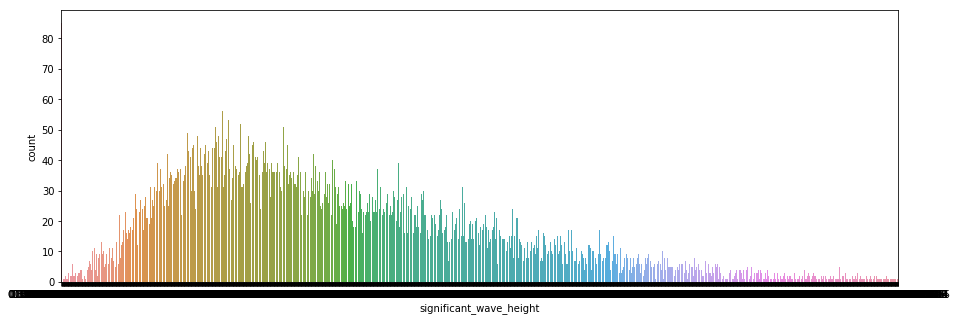

In [20]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(waves['significant_wave_height'])
plt.show()

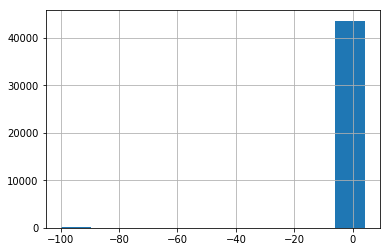

In [21]:
waves['significant_wave_height'].hist()

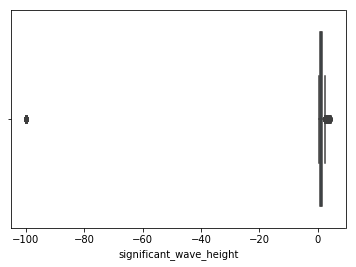

In [22]:
sns.boxplot(waves['significant_wave_height'])

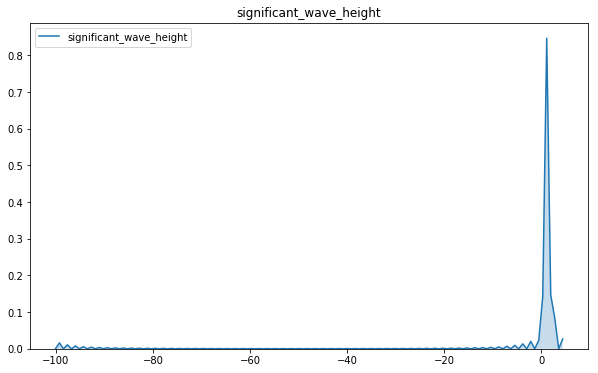

In [23]:
plt.figure(figsize=(10,6)) 
plt.title("significant_wave_height") 
sns.kdeplot(data=waves['significant_wave_height'], label="significant_wave_height", shade=True)

# 2. Maximum Wave Height

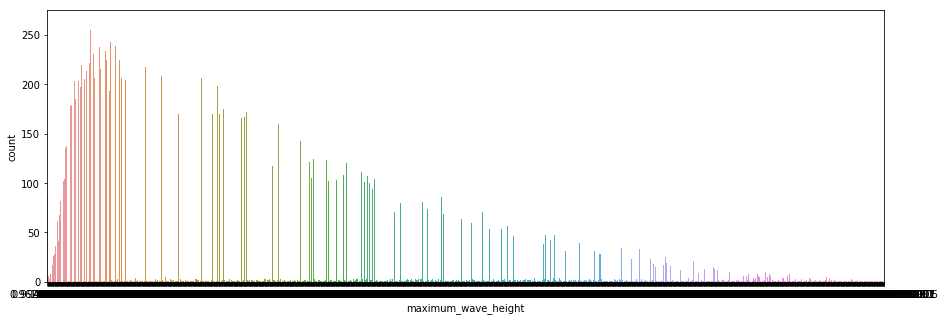

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(waves['maximum_wave_height'])
plt.show()

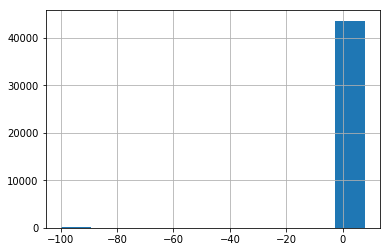

In [25]:
waves['maximum_wave_height'].hist()

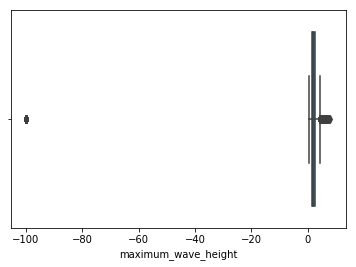

In [26]:
sns.boxplot(waves['maximum_wave_height'])

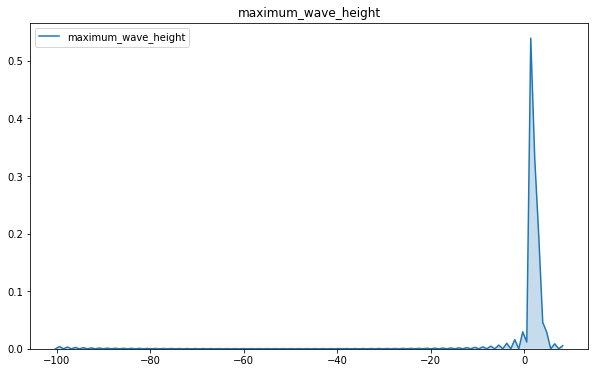

In [27]:
plt.figure(figsize=(10,6)) 
plt.title("maximum_wave_height") 
sns.kdeplot(data=waves['maximum_wave_height'], label="maximum_wave_height", shade=True)

# 3. Zero Wave Period

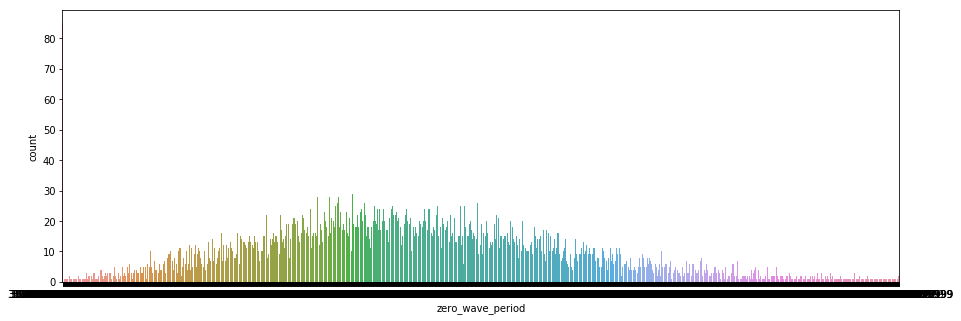

In [28]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(waves['zero_wave_period'])
plt.show()

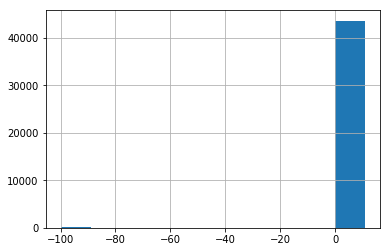

In [29]:
waves['zero_wave_period'].hist()

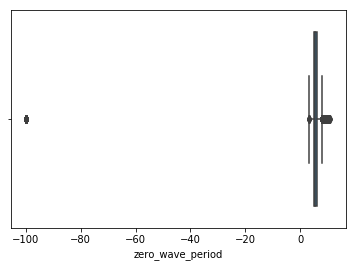

In [30]:
sns.boxplot(waves['zero_wave_period'])

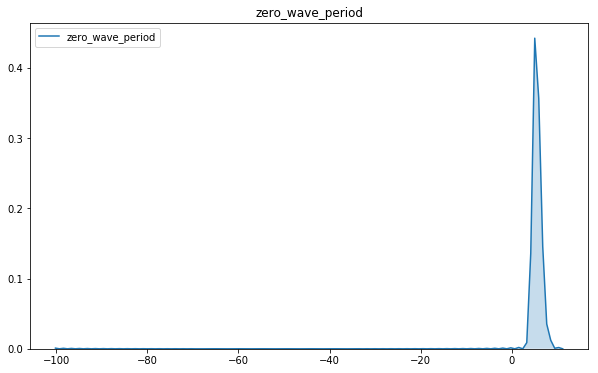

In [31]:
plt.figure(figsize=(10,6)) 
plt.title("zero_wave_period") 
sns.kdeplot(data=waves['zero_wave_period'], label="zero_wave_period", shade=True)

# 4. Peak Wave Period

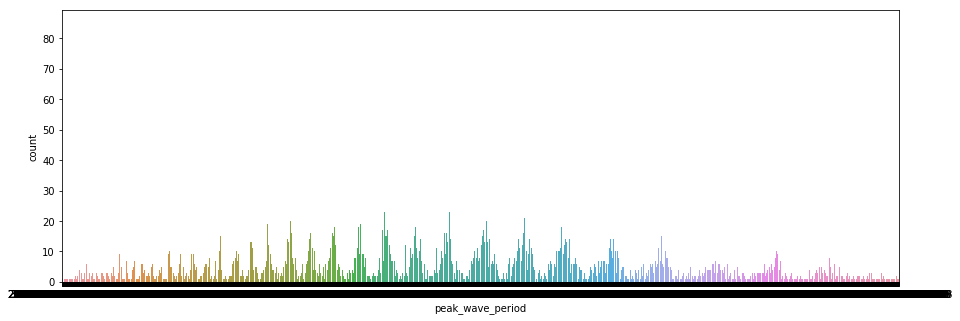

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(waves['peak_wave_period'])
plt.show()

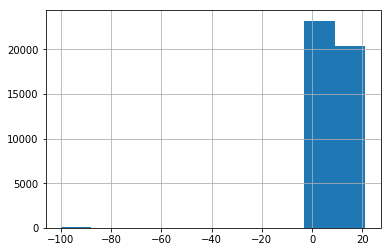

In [33]:
waves['peak_wave_period'].hist()

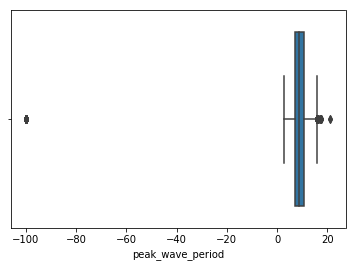

In [34]:
sns.boxplot(waves['peak_wave_period'])

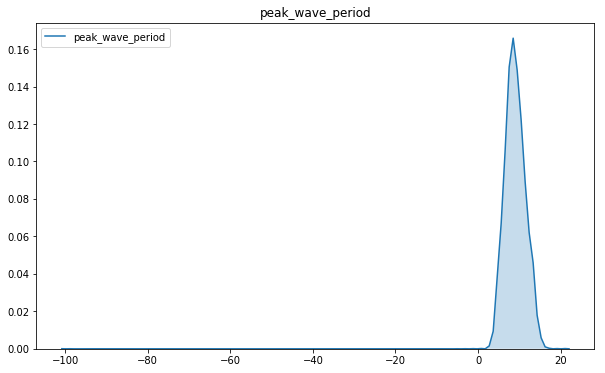

In [35]:
plt.figure(figsize=(10,6)) 
plt.title("peak_wave_period") 
sns.kdeplot(data=waves['peak_wave_period'], label="peak_wave_period", shade=True)

# 5. Wave Direction

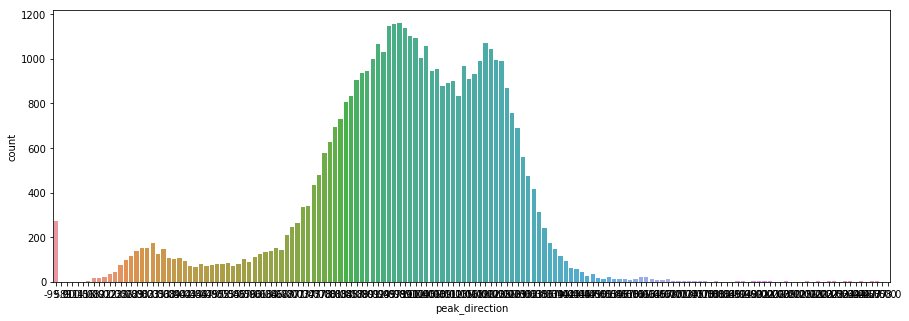

In [36]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(waves['peak_direction'])
plt.show()

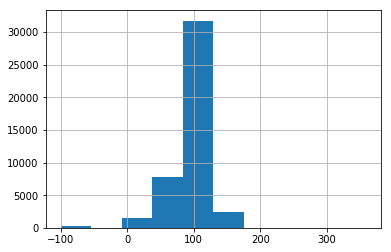

In [37]:
waves['peak_direction'].hist()

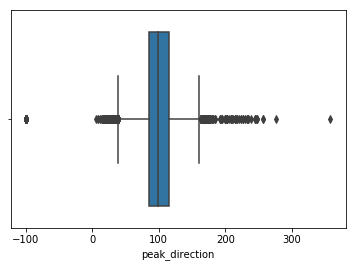

In [38]:
sns.boxplot(waves['peak_direction'])

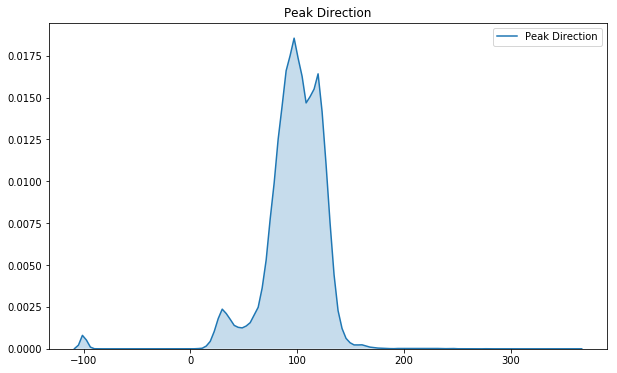

In [39]:
plt.figure(figsize=(10,6)) 
plt.title("Peak Direction") 
sns.kdeplot(data=waves['peak_direction'], label="Peak Direction", shade=True)

# 6. Sea Surface Temperature

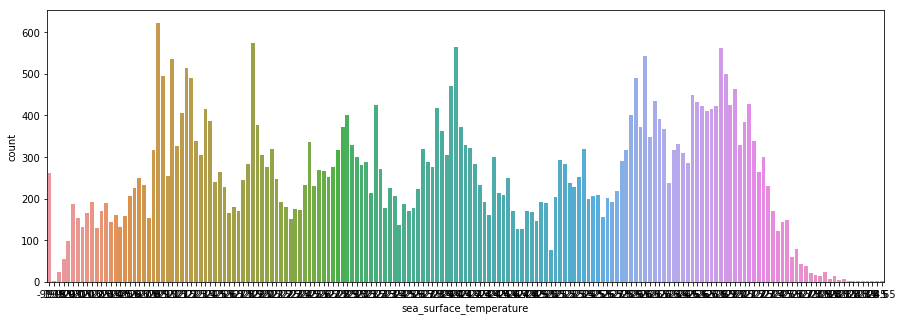

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(waves['sea_surface_temperature'])
plt.show()

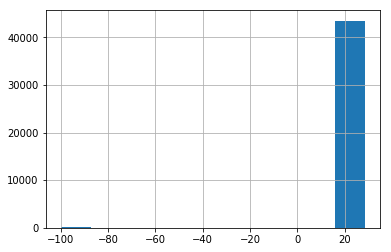

In [41]:
waves['sea_surface_temperature'].hist()

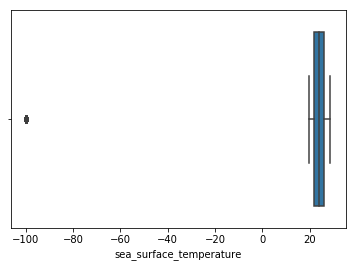

In [42]:
sns.boxplot(waves['sea_surface_temperature'])

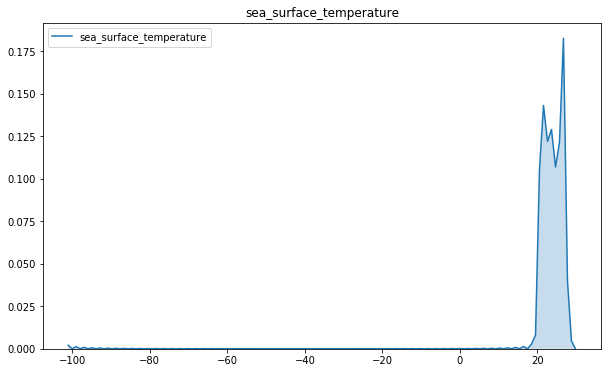

In [43]:
plt.figure(figsize=(10,6)) 
plt.title("sea_surface_temperature") 
sns.kdeplot(data=waves['sea_surface_temperature'], label="sea_surface_temperature", shade=True)

# Normalize the Data

In [44]:
# import libraries
from sklearn.preprocessing import scale
scale(waves1)

array([[-2.25020189e+01, -2.22215238e+01, -2.22212494e+01,
        -2.02834475e+01, -6.85466412e+00, -1.25450008e+01],
       [-3.70362252e-02, -1.09540146e-01, -2.09174261e-01,
        -8.00345010e-01, -6.85466412e+00, -1.25450008e+01],
       [-6.20035093e-02, -1.61933039e-01, -1.88284935e-01,
        -6.12429716e-01, -1.68140638e+00,  2.48907038e-01],
       ...,
       [ 2.48750010e-01,  3.35799440e-01,  7.92458400e-01,
         7.64185106e-01, -1.37343093e-02, -1.28133656e-01],
       [ 2.33145457e-01,  2.07000246e-01,  6.94974876e-01,
         4.04589504e-01, -1.87450150e-01, -1.28133656e-01],
       [ 1.97254986e-01,  2.37562766e-01,  6.53407226e-01,
         6.40649928e-01, -4.65395495e-01, -1.28133656e-01]])

There is negative values in the data then we can use Exponentials of the data

In [45]:
np.exp(scale(waves1))

array([[1.68848553e-10, 2.23519201e-10, 2.23580533e-10, 1.55242516e-09,
        1.05452577e-03, 3.56266806e-06],
       [9.63641227e-01, 8.96246183e-01, 8.11253853e-01, 4.49173968e-01,
        1.05452577e-03, 3.56266806e-06],
       [9.39879588e-01, 8.50498153e-01, 8.28378640e-01, 5.42032283e-01,
        1.86112048e-01, 1.28262279e+00],
       ...,
       [1.28242140e+00, 1.39905840e+00, 2.20881992e+00, 2.14724389e+00,
        9.86359576e-01, 8.79735789e-01],
       [1.26256512e+00, 1.22998287e+00, 2.00365873e+00, 1.49868717e+00,
        8.29070446e-01, 8.79735789e-01],
       [1.21805459e+00, 1.26815459e+00, 1.92207864e+00, 1.89771386e+00,
        6.27886730e-01, 8.79735789e-01]])

# Regression Model

# 1. Pair Plot

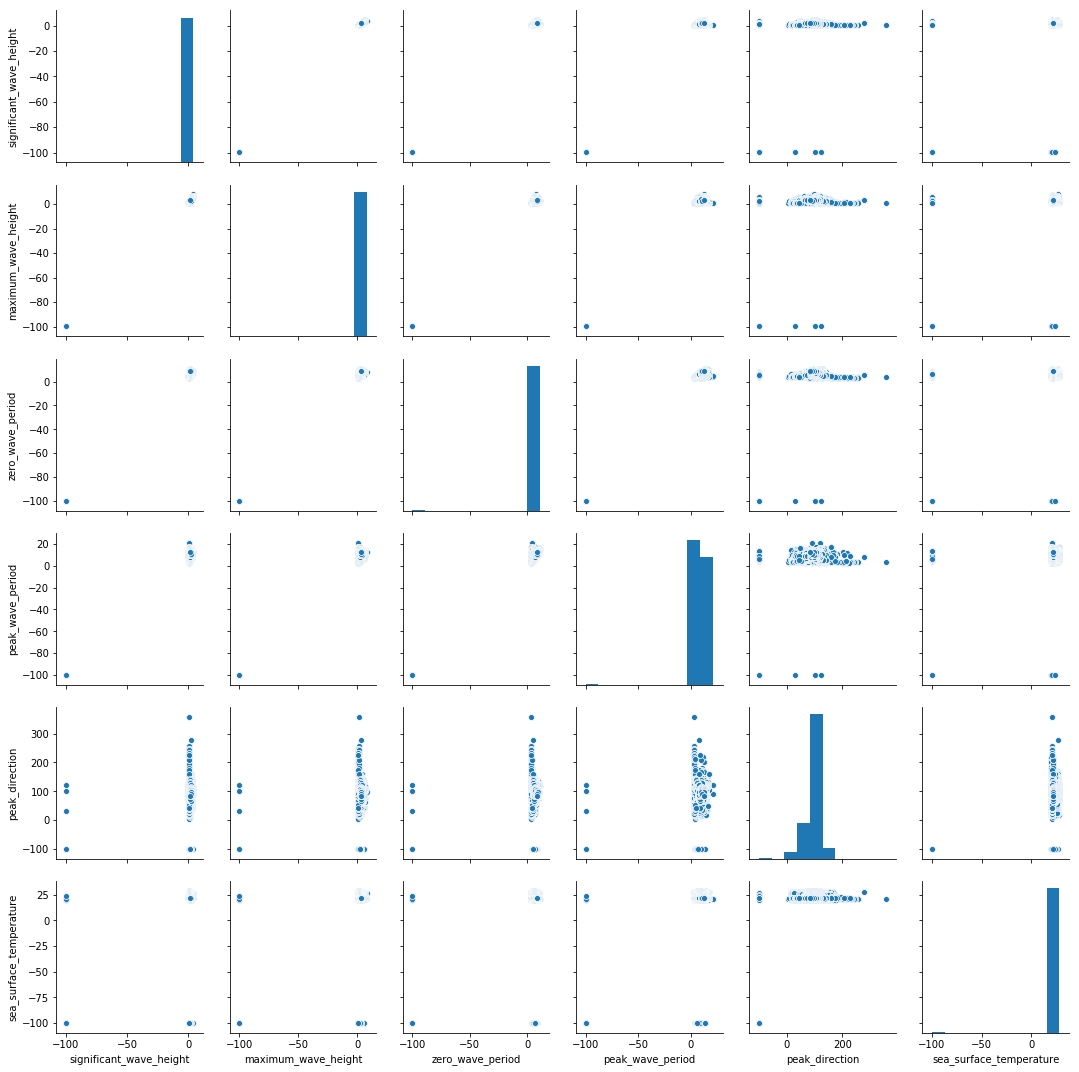

In [46]:
sns.pairplot(waves)

# 2. Correlation

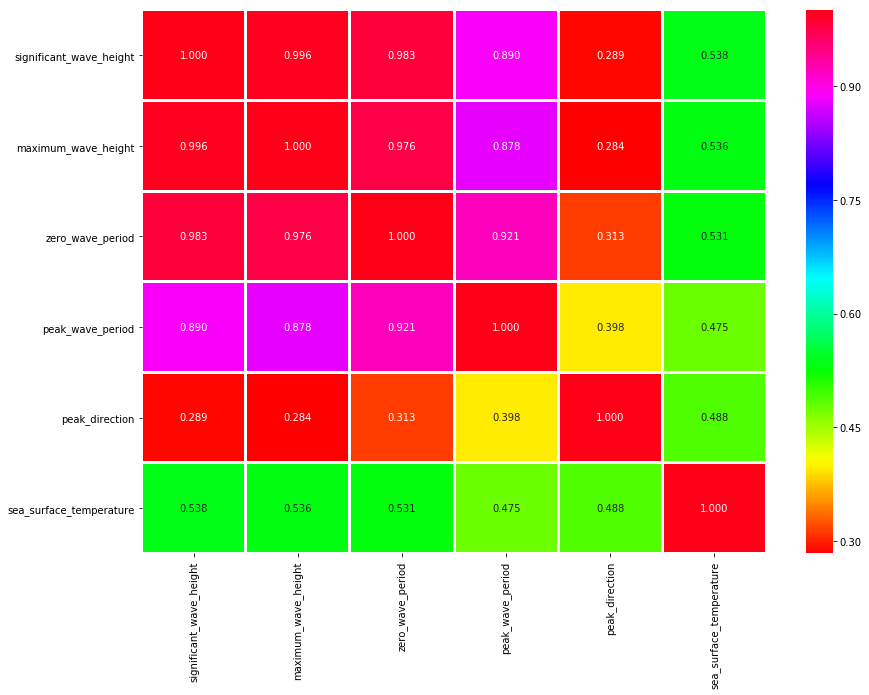

In [47]:
plt.figure(figsize=(14,10))
sns.heatmap(waves.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

# Correlation Matrix

In [48]:
waves.corr()

,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
significant_wave_height,1.000000,0.996258,0.983143,0.889705,0.289101,0.537835
maximum_wave_height,0.996258,1.000000,0.975953,0.878107,0.284123,0.535764
zero_wave_period,0.983143,0.975953,1.000000,0.921005,0.313282,0.531219
peak_wave_period,0.889705,0.878107,0.921005,1.000000,0.397541,0.474712
peak_direction,0.289101,0.284123,0.313282,0.397541,1.000000,0.488472
sea_surface_temperature,0.537835,0.535764,0.531219,0.474712,0.488472,1.000000


In [49]:
# Prepare Regression Model using all Objects
# import libraries 
import statsmodels.formula.api as smf

In [50]:
# Preparing model                  
Regression = smf.ols('significant_wave_height~maximum_wave_height+zero_wave_period+peak_wave_period+sea_surface_temperature+peak_direction',data=waves).fit() # regression model

In [51]:
# Getting coefficients of variables               
Regression.params

Intercept                 -1.555762
maximum_wave_height        0.755774
zero_wave_period           0.211367
peak_wave_period           0.004835
sea_surface_temperature    0.002505
peak_direction            -0.000796
dtype: float64

In [52]:
# Summary
Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     significant_wave_height   R-squared:                       0.995
Model:                                 OLS   Adj. R-squared:                  0.995
Method:                      Least Squares   F-statistic:                 1.750e+06
Date:                     Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                             09:59:55   Log-Likelihood:                -11715.
No. Observations:                    43728   AIC:                         2.344e+04
Df Residuals:                        43722   BIC:                         2.349e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.5558      0.007   -216.138      0.000      -1.570      -1.542
maximum_wave_height         0.7558      0.002    480.407      0.000       0.753       0.759
zero_wave_period            0.2114      0.002    113.599      0.000       0.208       0.215
peak_wave_period            0.0048      0.001      6.136      0.000       0.003       0.006
sea_surface_temperature     0.0025      0.000     12.320      0.000       0.002       0.003
peak_direction             -0.0008   6.45e-05    -12.346      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     5533.042   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9326.365
Skew:                          -0.865   Prob(JB):                         0.00
Kurtosis:                       4.457   Cond. No.                         508.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Import Libraries
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [54]:
x = waves1.drop(['significant_wave_height'], axis = 1)
y = waves1.significant_wave_height.values

In [55]:
# Fit the Model
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -1.5557619378722887
Coefficients: 
 [ 0.75577443  0.21136743  0.00483501 -0.00079573  0.00250479]


In [57]:
# Build Model
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

In [58]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          8.873e+05
Date:                Wed, 28 Aug 2019   Prob (F-statistic):                        0.00
Time:                        09:59:57   Log-Likelihood:                         -27606.
No. Observations:               43728   AIC:                                  5.522e+04
Df Residuals:                   43723   BIC:                                  5.526e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------